In [1]:
__author__ = 'wbhimji'
import sys,os
#os.environ['THEANO_FLAGS']='device=gpu0'
sys.path.append('/home/wbhimji/atlas_dl/notebooks')
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt
from notebooks.plotting.plot_images import plot_example, plot_examples,  compile_saliency_function, show_images, plot_feature_maps,GuidedBackprop 
%matplotlib inline
from notebooks.networks import binary_classifier as bc
from lasagne.nonlinearities import rectify as relu
from lasagne.layers import *
from notebooks.plotting.curve_plotter import plot_roc_curve
from notebooks.metrics.objectives import bg_rej_sig_eff, calc_ams, sig_eff_at

from notebooks.configs.setup_configs import setup_configs

importing Jupyter notebook from notebooks/plotting/plot_images.ipynb
importing Jupyter notebook from notebooks/networks/binary_classifier.ipynb
importing Jupyter notebook from notebooks/plotting/curve_plotter.ipynb
importing Jupyter notebook from notebooks/metrics/objectives.ipynb
importing Jupyter notebook from notebooks/util.ipynb
importing Jupyter notebook from notebooks/configs/setup_configs.ipynb
importing Jupyter notebook from notebooks/load_data/data_loader.ipynb


In [2]:
#networks, fns = cb.build_network(configs, bc.build_layers(configs))

In [3]:
a = h5py.File('/home/wbhimji/delphes_combined_64imageNoPU/val.h5')

In [4]:
y = a['all_events']["y"][0:10000]
#EM = a['all_events']['histEM'][0:10000]
E = a['all_events']['hist'][0:10000]
weight  = a['all_events']['weight'][0:10000]
passSRarray = a['all_events']['passSR'][0:10000]

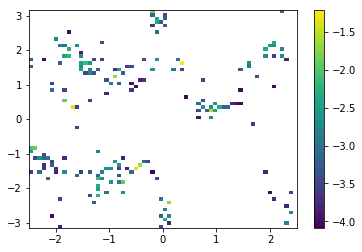

In [22]:
plot_example(E[y==1 ][3])

In [6]:
df = pd.DataFrame({'y': y, 'weight' : weight, 'passSR' : passSRarray})

In [7]:
np.unique(weight[y==0])

array([  1.21140000e-05,   2.91420000e-03,   1.78380000e-01,
         5.76720000e+00,   1.53684000e+02,   4.22280000e+03,
         5.63400000e+04,   1.48968000e+06,   7.18920000e+07])

In [8]:
df.groupby(df['weight'])['passSR'].sum()/df.groupby(df['weight'])['passSR'].count()

weight
1.211400e-05    0.078370
2.914200e-03    0.064000
1.783800e-01    0.033058
5.767200e+00    0.057437
1.536840e+02    0.058608
5.169600e+02    0.430836
4.222800e+03    0.038540
5.634000e+04    0.017241
1.489680e+06    0.007117
7.189200e+07    0.000000
Name: passSR, dtype: float64

In [9]:
keys=["hist", "weight", "normalized_weight", "y"]

In [10]:
d={k:a['all_events'][k][0:10] for k in keys}

In [11]:
pred = np.load("results/run169/pred.npy")

In [12]:
#df2 = pd.DataFrame({ 'pred' : pred})

In [13]:
SigCut = 0.97
BgCut = 0.00000000001
print "BgEfficiency: " + str(np.where(pred < BgCut)[0].shape[0] / float(pred.shape[0])*100) + "%"
print "SigEfficiency: " + str(np.where(pred > SigCut)[0].shape[0] / float(pred.shape[0])*100) + "%"
BgCutArray = pred < BgCut
SigCutArray = pred > SigCut

BgEfficiency: 4.28090288133%
SigEfficiency: 1.04822107935%


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


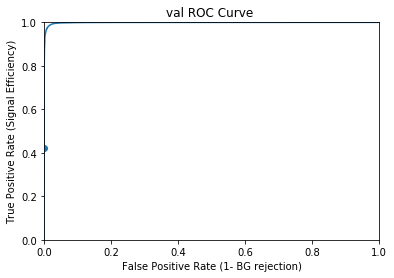

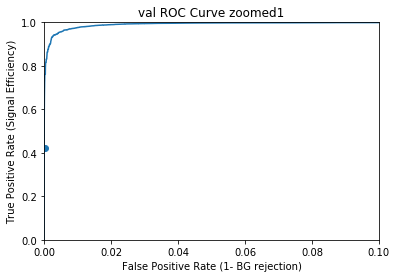

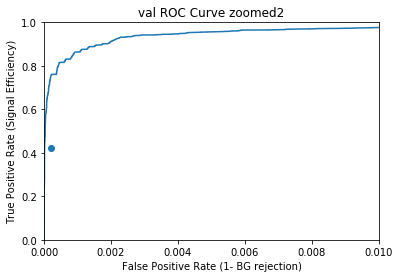

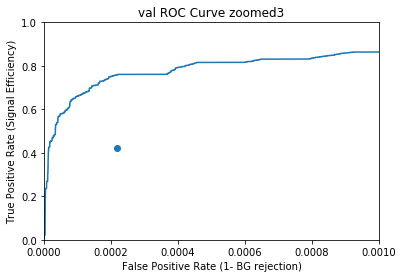

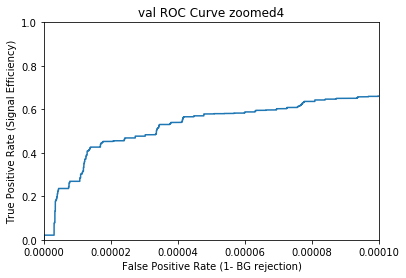

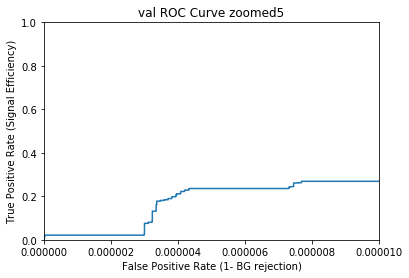

In [14]:
plot_roc_curve(pred, a['all_events']["y"][:],a['all_events']['weight'][:], a['all_events']['passSR'][:], 'val', './')

In [15]:
bg_rej_sig_eff( a['all_events']['passSR'][:],a['all_events']["y"][:],a['all_events']['weight'][:])

{'bg_rej': 0.99978254255328491, 'sig_eff': 0.42158366567786659}

In [16]:
pred10k = pred[0:10000]

In [17]:
E[y == 0 & SigCutArray[0:10000]].shape

(5836, 64, 64)

In [18]:
weight[(y == 1) & (passSRarray == 1) & (pred10k < 0.01) ]

array([ 516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96,  516.96,
        516.96,  516.96,  516.96,  516.96,  516.96,  516.96])

In [19]:
weight[ (y == 0) & (passSRarray == 0) & (pred10k > 0.01) ]

array([  5.63400000e+04,   5.63400000e+04,   4.22280000e+03,
         1.53684000e+02,   1.48968000e+06,   5.63400000e+04,
         4.22280000e+03,   1.53684000e+02,   5.63400000e+04,
         1.53684000e+02,   4.22280000e+03,   5.63400000e+04,
         1.53684000e+02,   5.76720000e+00,   5.63400000e+04,
         4.22280000e+03,   4.22280000e+03,   4.22280000e+03,
         1.21140000e-05,   4.22280000e+03,   1.48968000e+06,
         4.22280000e+03,   4.22280000e+03,   5.63400000e+04,
         5.63400000e+04,   5.63400000e+04,   4.22280000e+03,
         5.63400000e+04,   5.63400000e+04,   5.63400000e+04,
         2.91420000e-03,   4.22280000e+03,   4.22280000e+03,
         4.22280000e+03,   5.63400000e+04,   2.91420000e-03,
         5.76720000e+00,   1.53684000e+02,   1.53684000e+02,
         5.63400000e+04,   4.22280000e+03,   5.63400000e+04,
         5.63400000e+04,   4.22280000e+03,   5.76720000e+00,
         1.53684000e+02,   4.22280000e+03])

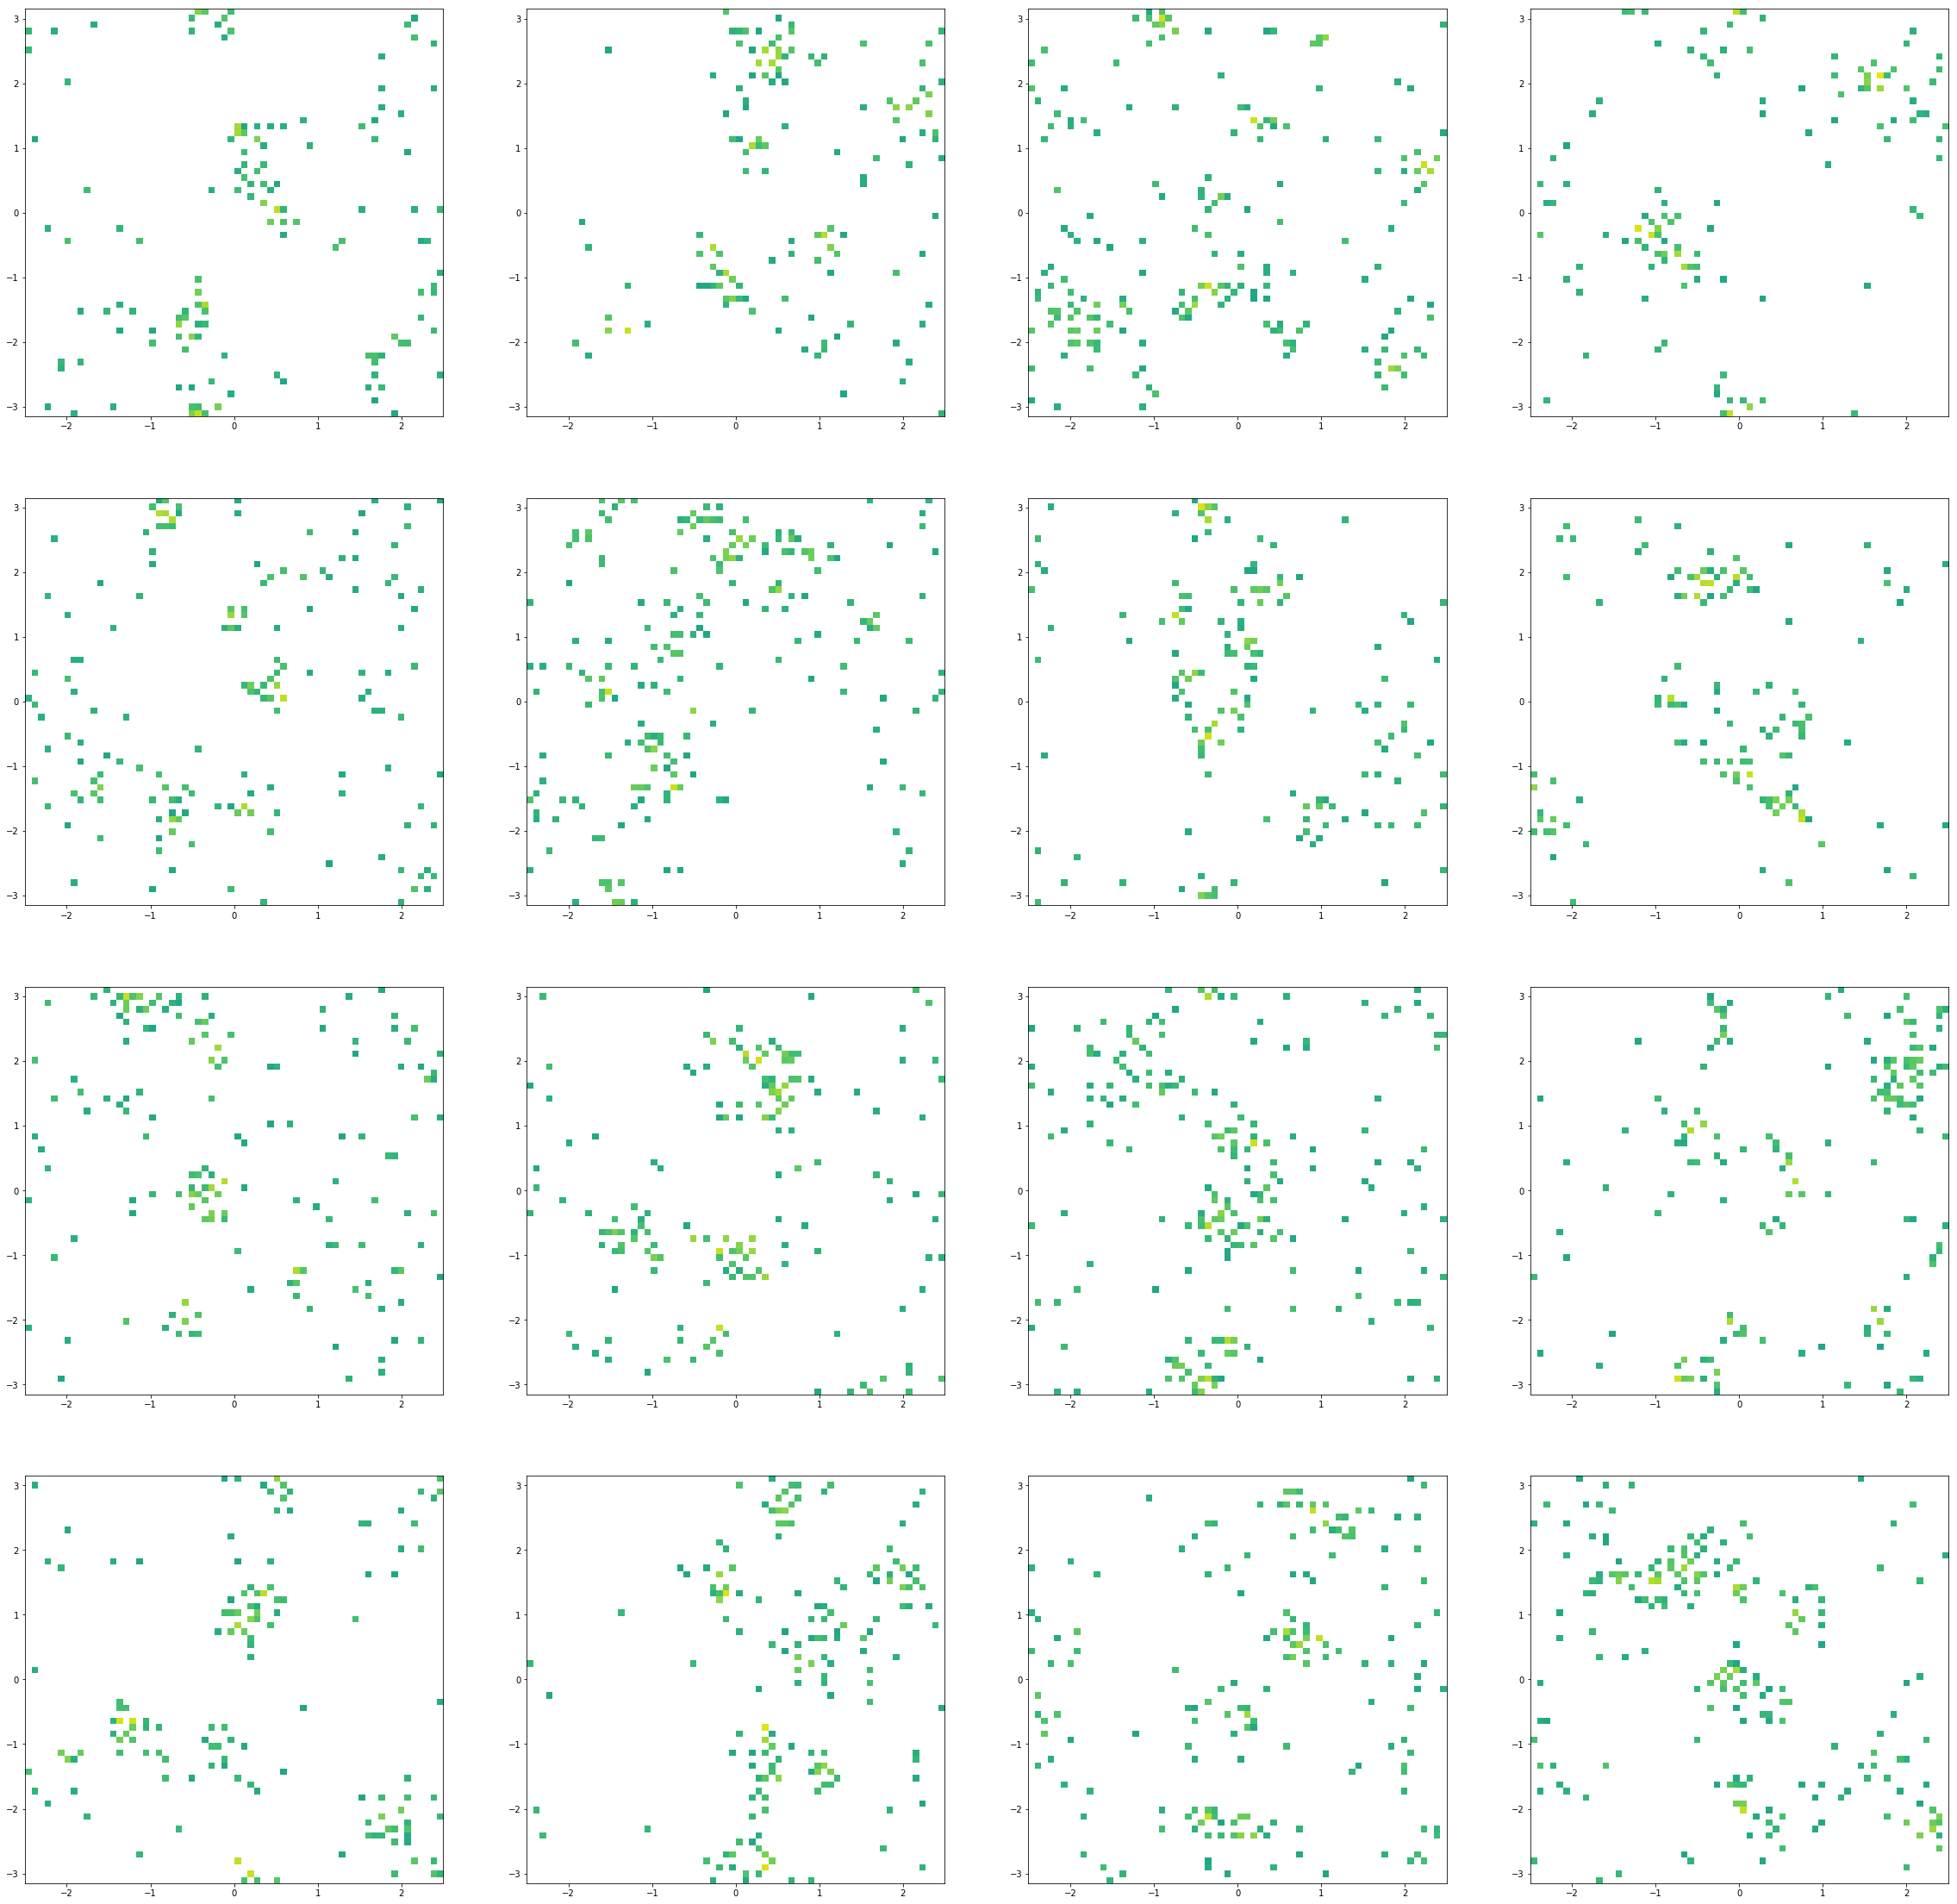

In [20]:
plot_examples(E[(y == 0) & (passSRarray == 0) & (pred10k > 0.01)][0:16],4)

In [21]:
plot_examples(E[(y == 0) &  (passSRarray == 0) & SigCutArray[0:10000]][0:16],4)

AssertionError: not the right number examples images

In [ ]:
configs = setup_configs()

In [ ]:
networks, fns = configs["net"].build_network(configs, configs["net"].build_layers(configs))

relu_layers = [layer for layer in get_all_layers(networks['net'])
               if getattr(layer, 'nonlinearity', None) is relu]
modded_relu = GuidedBackprop(relu)  # important: only instantiate this once!
for layer in relu_layers:
    layer.nonlinearity = modded_relu

In [ ]:
saliency_fn = compile_saliency_function(networks['net'])

In [ ]:
saliency, max_class = saliency_fn(np.expand_dims(np.expand_dims(E[(y == 1) & (passSRarray == 1) & SigCutArray[0:10000] ][1], axis=0),axis=0).astype("float32"))

In [ ]:
show_images(E[(y == 1) & (passSRarray == 1) & SigCutArray[0:10000] ][1], saliency, max_class, "default gradient")

In [ ]:
show_images(E[np.where(pred < BgCut)[0][2]], saliency, max_class, "default gradient")

In [ ]:
a = [[1,2,4,5,6,7,8],[3,4,4,3,2,3,4],[5,6,6,4,2,2,4]]
np.lib.pad(a,((0,0),(0,2)),'wrap')

In [ ]:
a = E[ (y == 1) & (passSRarray == 1) &  (pred < 0.01)[0:10000]][6]
b = np.lib.pad(a,((0,0),(0,1)),'wrap')

In [ ]:
b.shape

In [ ]:
plot_example(a)

In [ ]:
plot_example(b)

In [ ]:
plot_example(E[SigCutArray[0:10000] ][2])

In [ ]:
plot_feature_maps(E[(y == 1) & (passSRarray == 1) & (pred > 0.995)[0:10000] ][2].astype("float32"), networks['net'], "./", name="best_bg")

In [ ]:
y

In [ ]:
passSR == 0 

In [ ]:
y==0

In [ ]:
E[(y == 1) & (passSRarray == 1) & ~ SigCutArray[0:100000] ]

In [ ]:
BgCut = 0.000001
BgCutArray = pred < BgCut

In [ ]:
E [ (y == 1) & (passSRarray == 1) &(pred < 0.01)[0:10000]].shape